In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Exploranis las informacion que contiene el archivo
data = pd.read_csv(r'D:\USUARIO\Downloads\DATA SCIENCE\AprenAutomEjerc\Automobile.csv')
#Mostrar 
data

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


## Gráfico de dispersión : Millas por Galon vs Peso  

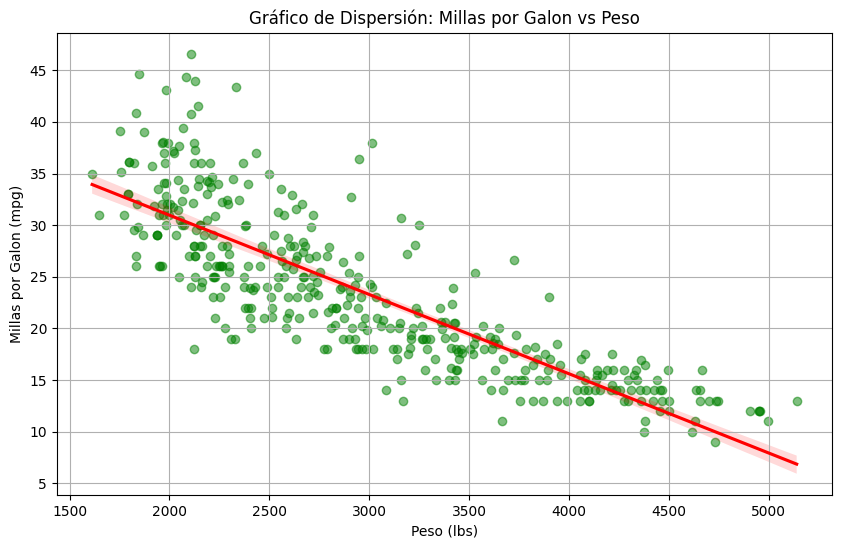

In [3]:
import seaborn as sns

plt.figure(figsize=(10, 6))  # Creo una nueva figura con un tamaño de 10x6 pulgadas
plt.scatter(data['weight'], data['mpg'], color='green', alpha=0.5)   # Dibujo un gráfico de dispersión de 'weight' vs 'mpg' en color verde con transparencia
sns.regplot(x='weight', y='mpg', data=data, scatter=False, color='red', line_kws={'label': 'Línea de Tendencia'})
plt.title('Gráfico de Dispersión: Millas por Galon vs Peso')   #  título
plt.xlabel('Peso (lbs)')  # Etiqueta del eje x
plt.ylabel('Millas por Galon (mpg)')    # Etiqueta del eje y
plt.grid(True)   # Activo la cuadrícula
plt.show()  # Muestro el gráfico

En el gráfico de dispersión que relaciona el peso de un vehículo con su consumo de combustible (mpg), se observa claramente que a medida que el peso aumenta, el consumo de combustible tiende a disminuir. Esto sugiere que los vehículos más pesados suelen ser menos eficientes en cuanto a combustible.  


## Histograma del consumo de combustible (`mpg`)

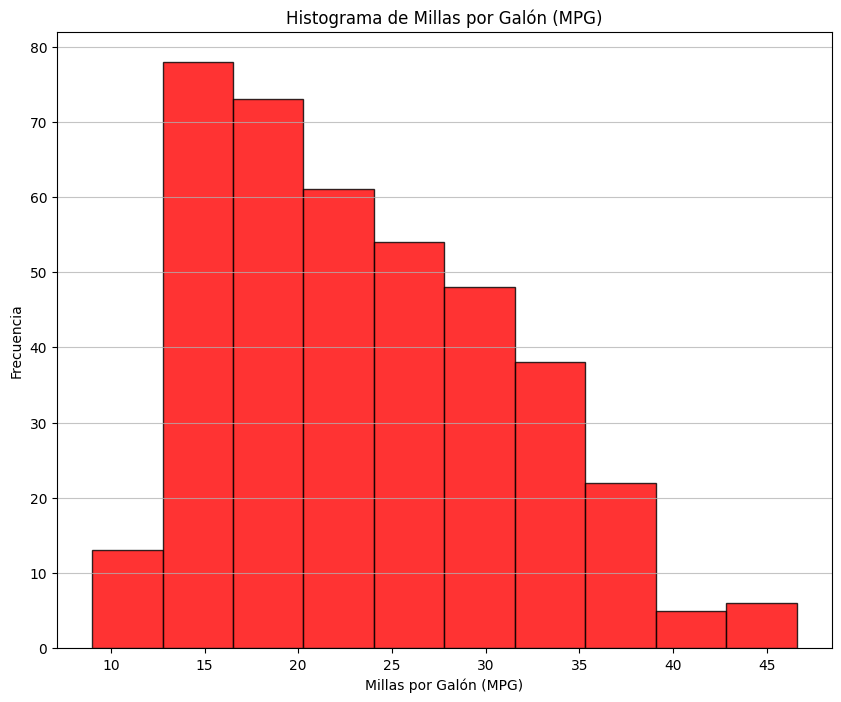

In [4]:
plt.figure(figsize=(10, 8))  # Tamaño de la figura
plt.hist(data['mpg'], bins=10, color='red', edgecolor='black', alpha=0.8 ) # Crear el histograma
plt.title('Histograma de Millas por Galón (MPG)')  
plt.xlabel('Millas por Galón (MPG)')  
plt.ylabel('Frecuencia')   
plt.grid(axis='y', alpha=0.75)   
plt.show()  

El histograma de millas por galón (mpg) revela una distribución asimétrica, con una concentración significativa de vehículos en el rango de 15 a 30 mpg, donde la frecuencia es más alta, especialmente entre 15 y 20 mpg. A medida que aumenta el rendimiento, la frecuencia disminuye notablemente, indicando que hay menos vehículos que alcanzan más de 35 mpg. Esta tendencia sugiere que muchos de los vehículos en el conjunto de datos son menos eficientes en términos de consumo de combustible, lo que podría reflejar características de la tecnología de los vehículos o el tipo de combustible utilizado.

## Diagrama de caja (boxplot): Cylinders y Origin

<Figure size 1000x600 with 0 Axes>

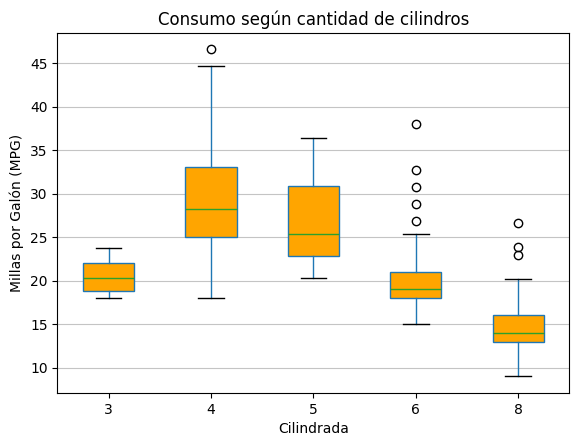

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 6))  
box = data.boxplot(column='mpg', by='cylinders', grid=False, patch_artist=True)  # Crear el boxplot

# Cambiar el color de las cajas a azul
for patch in box.patches:
    patch.set_facecolor('orange')  

plt.title('Consumo según cantidad de cilindros')   
plt.suptitle('')  
plt.xlabel('Cilindrada')   
plt.ylabel('Millas por Galón (MPG)')  
plt.grid(axis='y', alpha=0.75)  # Activar cuadrícula en el eje Y
plt.show()   

 

<Figure size 1000x600 with 0 Axes>

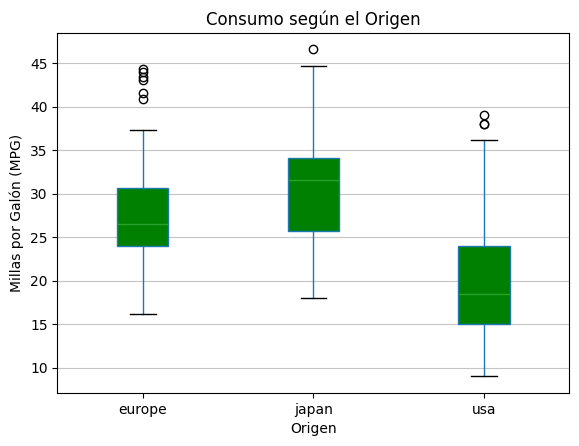

In [6]:
plt.figure(figsize=(10, 6))   
box = data.boxplot(column='mpg', by='origin', grid=False, patch_artist=True)   

# Cambiar el color de las cajas a azul
for patch in box.patches:
    patch.set_facecolor('green')   
plt.title('Consumo según el Origen') 
plt.suptitle('')  
plt.xlabel('Origen')
plt.ylabel('Millas por Galón (MPG)') 
plt.grid(axis='y', alpha=0.75)  
plt.show()  

En el análisis de los diagramas de caja se observan diferencias significativas en el consumo de combustible según la cantidad de cilindros y el origen de los vehículos. En el primer gráfico, se observa que los vehículos de 3 cilindros tienen la mayor variabilidad en el consumo, con una mediana de aproximadamente 30 MPG. A medida que aumenta la cantidad de cilindros, la mediana del consumo disminuye, con los vehículos de 8 cilindros mostrando el menor rendimiento, alrededor de 15 MPG. Los valores atípicos son particularmente notables en los grupos de 4 y 6 cilindros, donde algunos vehículos superan notablemente el rendimiento promedio, lo que podría indicar la presencia de modelos más eficientes o tecnologías avanzadas.

En el segundo gráfico, que muestra el consumo según el origen, se observa que los vehículos de origen europeo presentan varios outliers en el extremo superior, indicando un rendimiento excepcionalmente alto en comparación con los de Japón y EE. UU. Los vehículos japoneses tienen una mediana intermedia, mientras que los estadounidenses tienden a tener un consumo más bajo, reflejando la tendencia general observada en el primer gráfico. Estos valores atípicos en el gráfico de origen sugieren que algunos modelos europeos, posiblemente impulsados por tecnologías más eficientes, están logrando un rendimiento sobresaliente en comparación con sus contrapartes de otras regiones.  

## Gráfico de barras: distribución de automóviles según su año de modelo (`model_year`)

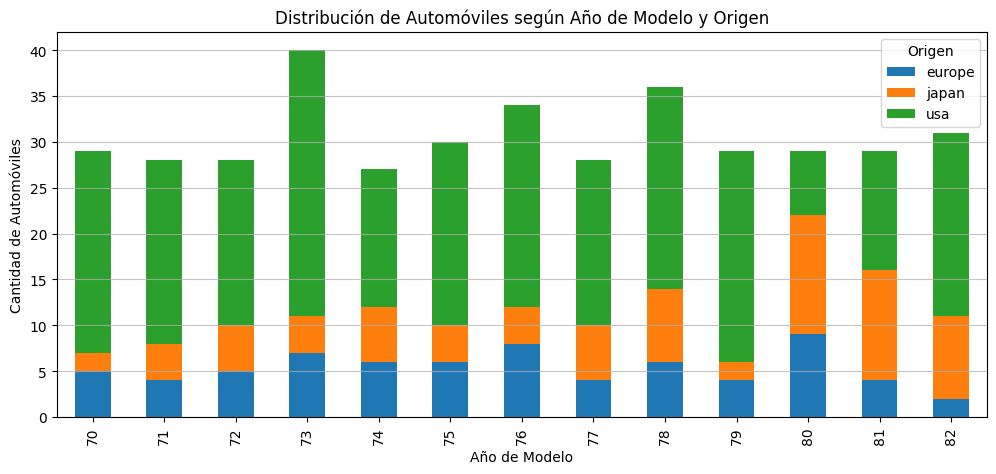

In [7]:
counts = data.groupby(['model_year', 'origin']).size().unstack()   # Cuento los autos por año de modelo y origen

counts.plot(kind='bar', stacked=True, figsize=(12, 5))  # Crear el gráfico de barras

plt.title('Distribución de Automóviles según Año de Modelo y Origen')  
plt.xlabel('Año de Modelo')  # 
plt.ylabel('Cantidad de Automóviles')  
plt.legend(title='Origen')  
plt.grid(axis='y', alpha=0.75)   
plt.show()   

A partir del grafico, se puede observar un aumento general en la cantidad de automóviles, con un notable predominio de los vehículos de origen japonés y estadounidense en los años 70, especialmente en 1974 y 1978, donde se registra la mayor cantidad de automóviles.
Los vehículos de origen europeo, representados en azul, muestran una presencia menor en comparación con los de Japón y EE. UU., aunque hay un ligero aumento en su producción en años como 1976 y 1979. Sin embargo, en general, los automóviles japoneses parecen dominar la oferta durante la mayor parte de la década, reflejando la creciente popularidad de estos vehículos en el mercado. Este patrón puede estar relacionado con la reputación de los automóviles japoneses por su eficiencia y confiabilidad, características muy valoradas por los consumidores de la época